In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing,cross_validation,svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
suez_cement=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Suez Cement.csv",index_col=1)

In [3]:
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS3C181C012,10479,236337.30,18,22.50,22.69,22.05,22.55
1/3/2013 0:00,EGS3C181C012,1890,42591.50,8,22.55,22.55,22.20,22.54
1/6/2013 0:00,EGS3C181C012,2257,50205.67,8,22.50,22.50,22.01,22.24
1/8/2013 0:00,EGS3C181C012,545,11939.95,3,22.00,22.00,21.87,21.91
1/9/2013 0:00,EGS3C181C012,1782,39146.32,6,22.01,22.01,21.92,21.97


In [4]:
suez_cement=suez_cement[-500:]
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
11/10/2015 0:00,EGS3C181C012,50,1447.50,1,28.95,28.95,28.95,27.97
11/11/2015 0:00,EGS3C181C012,917,23995.50,8,27.50,28.50,26.00,26.17
11/12/2015 0:00,EGS3C181C012,106,2803.48,3,28.48,28.48,25.00,26.17
11/15/2015 0:00,EGS3C181C012,10,236.00,1,23.60,23.60,23.60,26.17
11/16/2015 0:00,EGS3C181C012,250,5900.00,1,23.60,23.60,23.60,26.17


In [5]:
suez_cement['EWMA_12']=suez_cement['CLOSE_PRICE'].ewm(span=12).mean()
suez_cement['HL_PCT']=(suez_cement['HIGH_PRICE']-suez_cement['LOW_PRICE'])/suez_cement['LOW_PRICE']*100.0
suez_cement['PCT_change']=(suez_cement['CLOSE_PRICE']-suez_cement['OPEN_PRICE'])/suez_cement['OPEN_PRICE']*100.0
suez_cement.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,EWMA_12,HL_PCT,PCT_change
TRADE_DATE,,,,,,,,,,,
11/10/2015 0:00,EGS3C181C012,50,1447.50,1,28.95,28.95,28.95,27.97,27.970000,0.000000,-3.385147
11/11/2015 0:00,EGS3C181C012,917,23995.50,8,27.50,28.50,26.00,26.17,26.995000,9.615385,-4.836364
11/12/2015 0:00,EGS3C181C012,106,2803.48,3,28.48,28.48,25.00,26.17,26.673002,13.920000,-8.110955
11/15/2015 0:00,EGS3C181C012,10,236.00,1,23.60,23.60,23.60,26.17,26.514224,0.000000,10.889831
11/16/2015 0:00,EGS3C181C012,250,5900.00,1,23.60,23.60,23.60,26.17,26.420700,0.000000,10.889831


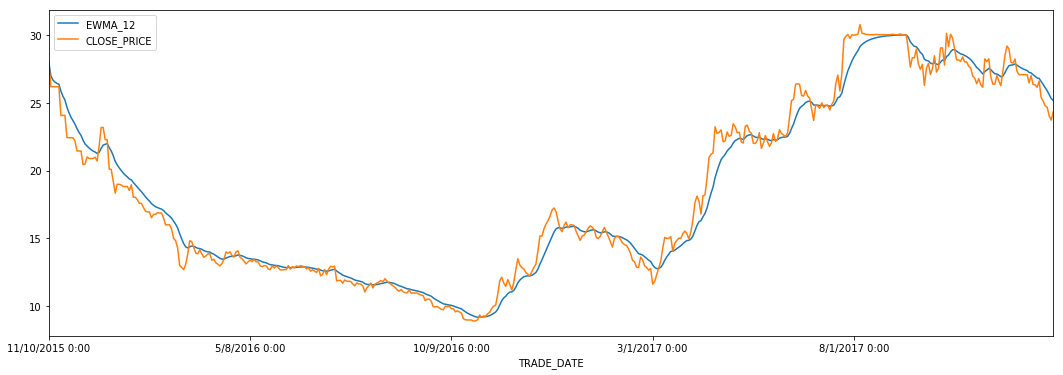

In [6]:
tmp=suez_cement[['EWMA_12','CLOSE_PRICE']].plot(figsize=(18,6))
plt.show()

In [7]:
suez_cement.dropna(inplace=True)
len(suez_cement)

500

In [8]:
suez_cement['CLOSE_PRICE'].shift(-5).tail()

TRADE_DATE
12/25/2017 0:00   NaN
12/26/2017 0:00   NaN
12/27/2017 0:00   NaN
12/28/2017 0:00   NaN
12/31/2017 0:00   NaN
Name: CLOSE_PRICE, dtype: float64

In [9]:
X=suez_cement[['EWMA_12','HL_PCT','PCT_change']].values
X

array([[ 27.97      ,   0.        ,  -3.3851468 ],
       [ 26.995     ,   9.61538462,  -4.83636364],
       [ 26.67300231,  13.92      ,  -8.11095506],
       ..., 
       [ 25.59286368,   3.79324719,   0.08333333],
       [ 25.30319235,   5.29661017,  -0.37815126],
       [ 25.15347045,   2.38493724,   1.79916318]])

In [10]:
y=suez_cement['CLOSE_PRICE'].values
y

array([ 27.97,  26.17,  26.17,  26.17,  26.17,  26.17,  24.06,  24.06,
        24.06,  22.42,  22.42,  22.41,  22.41,  22.17,  21.44,  21.44,
        21.44,  20.43,  20.48,  21.  ,  20.88,  20.88,  20.88,  20.98,
        20.7 ,  21.81,  23.17,  23.17,  22.27,  22.27,  20.1 ,  20.08,
        19.18,  18.33,  18.99,  18.98,  18.93,  18.82,  18.82,  18.82,
        18.53,  18.95,  18.03,  18.03,  17.84,  17.58,  17.58,  17.28,
        17.01,  16.95,  16.95,  16.52,  16.77,  16.77,  16.9 ,  16.87,
        16.87,  16.5 ,  16.  ,  16.  ,  16.  ,  15.68,  15.  ,  14.83,
        14.3 ,  13.01,  12.85,  12.7 ,  13.08,  13.83,  14.83,  14.76,
        14.33,  13.92,  13.86,  14.17,  13.86,  13.61,  13.7 ,  13.85,
        13.88,  13.39,  13.46,  13.2 ,  13.1 ,  12.97,  13.14,  13.45,
        14.  ,  13.91,  14.  ,  13.74,  13.63,  14.01,  14.08,  13.61,
        13.5 ,  13.32,  13.12,  13.27,  13.4 ,  13.28,  13.46,  13.28,
        13.26,  12.98,  12.92,  13.  ,  12.97,  12.75,  12.69,  12.99,
      

In [11]:
len(X),len(y)

(500, 500)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False,random_state=1)

In [13]:
len(X),len(X_train),len(X_test)

(500, 350, 150)

In [14]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [15]:
LR=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=3)
SVR=svm.SVR(kernel='rbf')

In [16]:
LR.fit(X_train,y_train)
KNN.fit(X_train,y_train)
SVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred_LR=LR.predict(X_test)
y_pred_KNN=KNN.predict(X_test)
y_pred_SVR=SVR.predict(X_test)
len(y_pred_LR)

150

In [18]:
suez_cement['LR_pred']=np.nan
suez_cement['KNN_pred']=np.nan
suez_cement['SVR_pred']=np.nan
suez_cement['LR_pred'].iloc[350:]=y_pred_LR
suez_cement['KNN_pred'].iloc[350:]=y_pred_KNN
suez_cement['SVR_pred'].iloc[350:]=y_pred_SVR

C:\Users\mohamed ismail\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
suez_cement.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,EWMA_12,HL_PCT,PCT_change,LR_pred,KNN_pred,SVR_pred
TRADE_DATE,,,,,,,,,,,,,,
12/25/2017 0:00,EGS3C181C012,628,15555.56,1,24.77,24.77,24.77,24.77,26.100446,0.000000,0.000000,25.325024,21.106667,21.491294
12/26/2017 0:00,EGS3C181C012,4685,115525.55,11,24.86,25.00,24.00,24.66,25.878839,4.166667,-0.804505,25.360876,22.450000,22.224897
12/27/2017 0:00,EGS3C181C012,16299,391556.00,24,24.00,24.90,23.99,24.02,25.592864,3.793247,0.083333,25.129992,22.623333,22.465111
12/28/2017 0:00,EGS3C181C012,2456,58242.34,11,23.80,24.85,23.60,23.71,25.303192,5.296610,-0.378151,24.927229,22.400000,22.168651
12/31/2017 0:00,EGS3C181C012,2632,64041.50,5,23.90,24.47,23.90,24.33,25.153470,2.384937,1.799163,24.740905,22.400000,22.393976


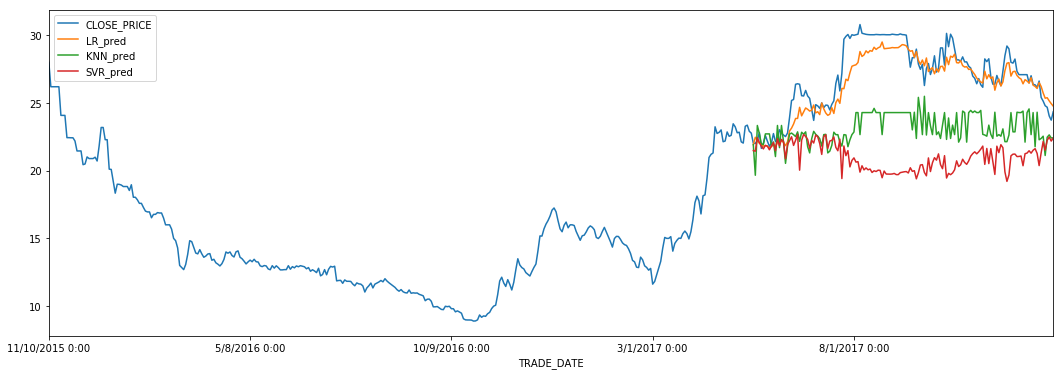

In [20]:
suez_cement[['CLOSE_PRICE','LR_pred','KNN_pred','SVR_pred']].plot(figsize=(18,6))
plt.show()

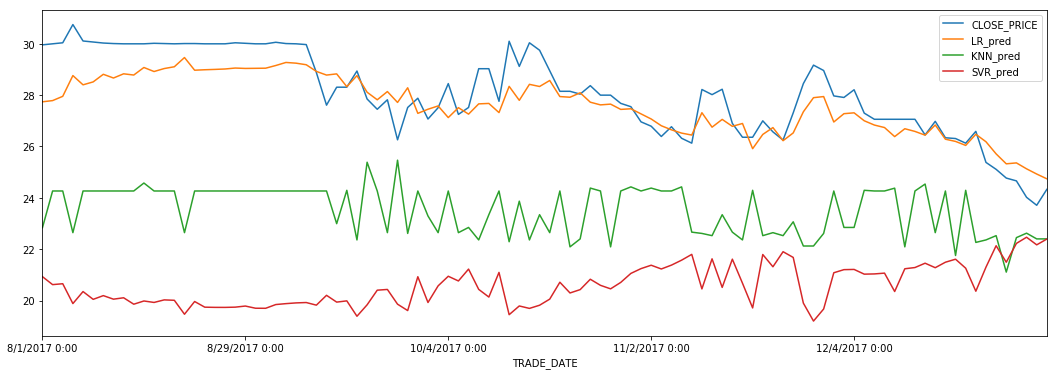

In [21]:
suez_cement[['CLOSE_PRICE','LR_pred','KNN_pred','SVR_pred']][400:].plot(figsize=(18,6))
plt.show()

In [22]:
LR_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_LR))
KNN_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_KNN))
SVR_RMSE=np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_SVR))

In [23]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('SVR :',SVR_RMSE)

Linear Regression : 1.0860406544
KNN : 4.40780430768
SVR : 6.77779876281


In [24]:
accuracy_LR=LR.score(X_test,y_test)
accuracy_LR*100.0

80.727832733104407

In [26]:
LR_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_LR)
KNN_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_KNN)
SVR_RMSE=mean_squared_error(y_true=y_test,y_pred=y_pred_SVR)

In [27]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('SVR :',SVR_RMSE)

Linear Regression : 1.179484303
KNN : 19.4287388148
SVR : 45.9385560691
